In [3]:
import os, sys
print(os.getcwd())

/Users/manish/Desktop/Python/finance


<ul>
<li> Extracting data from quandl </li>
<li> plotting NAV values to get a sense of larger picture</li>
<li> Everday returns chart to get a sense of dynamic nature of markets </li></ul>

In [4]:
import quandl
mf = quandl.get("AMFI/112323", start_date="2016-08-30", end_date="2019-03-15")
# Axis Long Term Equity Fund - Direct Plan - Growth
# AMFI data

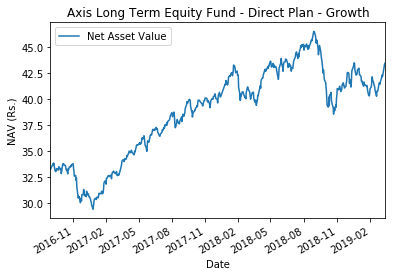

In [5]:
import matplotlib.pyplot as plt

mf[['Net Asset Value']].plot()
plt.title("Axis Long Term Equity Fund - Direct Plan - Growth")
plt.ylabel('NAV (Rs.)')
plt.show()

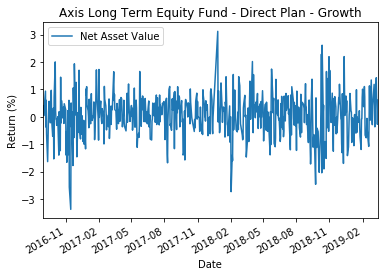

In [6]:
# Keeping only net asset value
mf = mf[['Net Asset Value']]

# Return calculations (per day)
mf_ret = mf.pct_change()

# Plotting everyday returns
(mf_ret*100).plot()
plt.title("Axis Long Term Equity Fund - Direct Plan - Growth")
plt.ylabel('Return (%)')
plt.show() 

<heading><b>Calculating Sharpe Ratio</b></heading>
<img src="https://study.com/cimages/multimages/16/sharpe-ratio.png">

Sharpe ratio measures how much investor is receiving in excess of riskless rate for assuming risk of portfolio(mutual fund in this case). Moreover, it is unaffected by addition of cash or leverage which might be the case for certain fund managers given increased pressure to beat the benchmark returns.

In [7]:
import math

rf = .075
print('India - 10-Year Government Bond Yield: ', str(rf*100),'%')

# Average return
mean_returns = mf_ret.mean()*252
print('Mean return:' ,str(mean_returns['Net Asset Value'].round(4)*100),'%')


# std_deviation
std_deviation= mf_ret.std() * math.sqrt(252)
print ('Standard Deviation: ',std_deviation['Net Asset Value'].round(4) )
# print (mf_ret.round(4)*100)

#Sharpe ratio calculation
sharpe =  ((mean_returns - rf)/ (std_deviation )) 
print ("Sharpe Ratio: ",str(sharpe['Net Asset Value'].round(4)))


India - 10-Year Government Bond Yield:  7.5 %
Mean return: 11.66 %
Standard Deviation:  0.1209
Sharpe Ratio:  0.3444


<heading><b>Calculating Information Ratio</b></heading>

<img src="https://financetrain.com/assets/information-ratio.gif">

Information Ratio helps to measure the consistency of returns in excess of benchmark returns (BSE200 in this case). Having a negative or zero IR is a strong indication of value added being much lower than being justified by the management fee. It can also be used to identify closet index funds which advertise itself as actively managed but have behaviour close to index funds.

In [8]:
# Benchmark returns
# S&P BSE 200
benchmark = quandl.get("BSE/BSE200",start_date="2016-08-30", end_date="2019-03-15")
# benchmark[['Close']].plot()
# plt.show()

benchmark_ret = benchmark[['Close']].pct_change()
mean_benchmark_ret = benchmark_ret.mean()*252
print('Mean benchmark return:' ,str(mean_benchmark_ret['Close'].round(4)*100),'%')

# Active return
active_Return =  mf_ret['Net Asset Value']-benchmark_ret['Close']
print('Mean active return:' ,str( (mean_returns['Net Asset Value'] - mean_benchmark_ret['Close']).round(4) *100),'%')

# std_deviation
std_deviation_active = active_Return.std() * math.sqrt(252)
print ('Standard Deviation(active return): ',round(std_deviation_active,4))
# print (mf_ret.round(4)*100)

IR= (mean_returns['Net Asset Value'] - mean_benchmark_ret['Close'])/std_deviation_active
print ('Information Ratio: ',str(IR.round(4)))

Mean benchmark return: 10.75 %
Mean active return: 0.92 %
Standard Deviation(active return):  0.0583
Information Ratio:  0.1576



<heading><b>Performance Attribution Analysis</b></heading><br>

The active return or the value-added return (return of the portfolio – benchmark return) can be broken into three components.

<img src="active_return.png">

<ol>
<li>Asset Allocation return: This component represents the returns that can be attributed to asset allocation decision of the fund. </li>
<li>Security Selection return: This represents value added due to security selection in the chosen asset classes.</li>
<li>Security-Asset selection allocation interaction return: This involves the joint effect of asset allocation and security selection.</li>
</ol>

In [9]:
#Defining the weights and returns of all sectors in portfolio and benchmark
# Getting data at this level is bit of an issue without premium account so illustrating through hypothetical portfolio

import pandas as pd

pr = pd.DataFrame({ 
                    'port_weights' : (0.0763,0.2463, 0.4017, 0.00, 0.00, 0, 0.0338, 0.1569, 0.0225, 0.0177, 0.0448),
                    'bench_weights' : (0.0856, 0.1014, 0.3417, 0.0031, 0.0137, 0.0963, 0.0554, 0.1245, 0.1009, 0.0476, 0.0298),
                    'port_returns' : (0.0196, 0.0155, 0.0298, 0.00, 0.00, 0, 0.0147, 0.0232, 0.0213, -0.0043, 0.0054),
                    'bench_returns' : (0.0198, 0.0168, 0.0222, -0.0271, -0.0127, 0.0024, 0.0123, -0.0048, 0.0195, -0.0024, -0.0042)         
                  },
                    index = ['Basic Materials','Consumer Cyclinal','Financial Sevices','Real Estate','Communication Services','Energy','Industrials','Technology','Consumer Defensive','Healthcare','Utilities']

                 )

pr.index.name='Sector'


In [10]:
pr[['port_weights', 'bench_weights', 'port_returns', 'bench_returns']]

,port_weights,bench_weights,port_returns,bench_returns
Sector,,,,
Basic Materials,0.0763,0.0856,0.0196,0.0198
Consumer Cyclinal,0.2463,0.1014,0.0155,0.0168
Financial Sevices,0.4017,0.3417,0.0298,0.0222
Real Estate,0.0000,0.0031,0.0000,-0.0271
Communication Services,0.0000,0.0137,0.0000,-0.0127
Energy,0.0000,0.0963,0.0000,0.0024
Industrials,0.0338,0.0554,0.0147,0.0123
Technology,0.1569,0.1245,0.0232,-0.0048
Consumer Defensive,0.0225,0.1009,0.0213,0.0195


In [11]:
#Sum of weights of sectors in portfolio

sum_port_weights = 0
for i in range(len(pr['port_weights'])):
    sum_port_weights+=pr['port_weights'][i]
print ('Sum of portfolio weights: ', str(round(sum_port_weights)))

#Sum of weights of sectors in benchmark
sum_bench_weights = 0
for i in range(len(pr['bench_weights'])):
    sum_bench_weights+=pr['bench_weights'][i]
print ('Sum of benchmark weights: ', str(round(sum_bench_weights)))

#Return from portfolio
ret_port=0
for i in range(len(pr['port_returns'])):
    ret_port+=pr['port_weights'][i]*pr['port_returns'][i]/sum_port_weights
print ('Return from portfolio: ', str(round(ret_port*100,4)),'%')

#Return from benchmark
ret_bench=0
for i in range(len(pr['bench_returns'])):
    ret_bench+=pr['bench_weights'][i]*pr['bench_returns'][i]/sum_bench_weights
print ('Return from the benchmark: ', str(round(ret_bench*100,4)),'%')

#Active return from portfolio
ret_active = ret_port - ret_bench
print ('Active return: ', str(round(ret_active*100,4)),'%')

#Pure sector return(asset allocation)
pure_sec_ret=0
for i in range(len(pr['port_weights'])):
    pure_sec_ret+=(pr['port_weights'][i]-pr['bench_weights'][i])*(pr['bench_returns'][i]-ret_bench)/sum_port_weights
print ('Pure Sector selection return: ', str(round(pure_sec_ret*100,4)),'%')
 
# Security selection return
wit_sec_ret=0
for i in range(len(pr['port_weights'])):
    wit_sec_ret+=pr['bench_weights'][i]*(pr['port_returns'][i]-pr['bench_returns'][i])/sum_port_weights
print ('Security selection return: ', str(round(wit_sec_ret*100,4)),'%')

#Calculating allocation-security selection interaction return
sel_int_ret=0
for i in range(len(pr['port_weights'])):
    sel_int_ret+=(pr['port_weights'][i]-pr['bench_weights'][i])*(pr['port_returns'][i]-pr['bench_returns'][i])/sum_port_weights
print ('Allocation-security selection interaction return: ', str(round(sel_int_ret*100,4)),'%')

#Summing up the components
ret_active_2 = pure_sec_ret + sel_int_ret + wit_sec_ret
print ('Total active return from components: ', str(round(ret_active_2*100,4)),'%')


Sum of portfolio weights:  1.0
Sum of benchmark weights:  1.0
Return from portfolio:  2.2066 %
Return from the benchmark:  1.2769 %
Active return:  0.9297 %
Pure Sector selection return:  0.1668 %
Security selection return:  0.6471 %
Allocation-security selection interaction return:  0.1158 %
Total active return from components:  0.9297 %
